In [ ]:
!nvidia-smi

Wed Dec 27 09:18:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -qU \
  transformers \
  sentence-transformers \
  pinecone-client \
  datasets \
  accelerate \
  einops \
  langchain \
  xformers \
  bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 29.8 

In [ ]:
from torch import cuda
from langchain.embeddings.huggingface import HuggingFaceEmbeddings

#Model embed
embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

#Cấu hình thiết bị
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

embed_model = HuggingFaceEmbeddings(
    model_name=embed_model_id,
    model_kwargs={'device': device},
    encode_kwargs={'device': device, 'batch_size': 32}
)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#Thử embed 2 document
docs = [
    "this is one document",
    "and another document"
]

embeddings = embed_model.embed_documents(docs)

print(f"We have {len(embeddings)} doc embeddings, each with "
      f"a dimensionality of {len(embeddings[0])}.")


We have 2 doc embeddings, each with a dimensionality of 384.


In [ ]:
print(embeddings[0])

[-0.04387660697102547, 0.10222943127155304, 0.034341681748628616, 0.03683441877365112, 0.014636065810918808, 0.002555790590122342, -0.02668207697570324, 0.004757586866617203, 0.0707392618060112, 0.022777527570724487, -0.03546980023384094, 0.052876561880111694, 0.03137441724538803, -0.02479337900876999, -0.08089102059602737, 0.013834857381880283, -0.10256607830524445, -0.014866351149976254, 0.011425233446061611, 0.05620942637324333, 0.02174297161400318, 0.10415410250425339, 0.03524508699774742, -0.00814291276037693, -0.008433768525719643, 0.033048320561647415, -0.1072707399725914, -0.02743491530418396, 0.018199002370238304, -0.0960589274764061, 0.06317240744829178, 0.08007874339818954, 0.016662513837218285, 0.0659695714712143, 0.0683528482913971, -0.006948659662157297, 0.0574386864900589, 0.023682737722992897, 0.031730521470308304, 0.06392650306224823, 0.010606263764202595, -0.08246445655822754, -0.062113091349601746, 0.0036018749233335257, -0.0020244598854333162, -0.0028707145247608423

In [ ]:
from torch import cuda, bfloat16
import transformers

model_id = 'NousResearch/Llama-2-7b-chat-hf'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)



model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
)

model.eval()
print(f"Model loaded on {device}")

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


Model loaded on cuda:0


In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id
)

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
from langchain.llms import HuggingFacePipeline

generate_text = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    return_full_text=True,  # langchain expects the full text
    task='text-generation',
    # we pass model parameters here too
    temperature=0.0,  # 'randomness' of outputs, 0.0 is the min and 1.0 the max
    max_new_tokens=256,  # mex number of tokens to generate in the output
    repetition_penalty=1.1  # without this output begins repeating
)


llm = HuggingFacePipeline(pipeline=generate_text)

In [ ]:
res = llm(prompt="Tell me about Large Language Models?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
print("Question: \nTell me about Large Language Models?\n")
print("Respone from llama2 : " + res)

Question: 
Tell me about Large Language Models?

Respone from llama2 : 
 nobody knows what the future of work will look like, but one thing is certain: AI will play a major role in shaping it. Large language models (LLMs) are at the forefront of this change, and their


In [ ]:
from langchain.chains import RetrievalQA , RetrievalQAWithSourcesChain
from langchain.evaluation import load_evaluator

Load Data từ hugging face

In [ ]:
from datasets import load_dataset

data = load_dataset('rag-datasets/mini_wikipedia', 'text-corpus',split='passages')

Generating passages split: 0 examples [00:00, ? examples/s]

In [ ]:
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
docs = []

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 256,
    chunk_overlap  = 20,
    length_function = len,
    add_start_index = True,
)

chunk_id = 1;
for row in data:
  chunk_content = text_splitter.split_text(row["passage"])
  for content in chunk_content:
    doc = Document(
          page_content=content,
          metadata={
              # "title": row["passage"],
              "source": row["passage"],
              "chunk-id": chunk_id,
               "id": row["id"],
              "text": content
          }
      )
    docs.append(doc)
    chunk_id = chunk_id + 1

print(len(docs))

In [ ]:
print(docs[-1])

page_content='*  - A modern illustrated guide to identification of US waterfowl.' metadata={'source': '*  - A modern illustrated guide to identification of US waterfowl.', 'chunk-id': 6859, 'id': 3200, 'text': '*  - A modern illustrated guide to identification of US waterfowl.'}


Khởi tạo vectorstore Pinecone

In [ ]:
import os
import pinecone

index_name = 'llama-2-rag'
# get API key from app.pinecone.io and environment from console
pinecone.init(
    api_key=os.environ.get('PINECONE_API_KEY') or '83e77e6e-d94e-4664-bc8f-4992c0263f9d',
    environment=os.environ.get('PINECONE_ENVIRONMENT') or 'gcp-starter'
)

In [ ]:

import time

index_name = 'llama-2-rag'

if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name,
        dimension=len(embeddings[0]),
        metric='cosine'
    )
    # wait for index to finish initialization
    while not pinecone.describe_index(index_name).status['ready']:
        time.sleep(1)

In [ ]:
index = pinecone.Index(index_name)
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.06859,
 'namespaces': {'': {'vector_count': 6859}},
 'total_vector_count': 6859}

In [ ]:
from tqdm.auto import tqdm
from uuid import uuid4

batch_size = 100

for i in tqdm(range(0, len(docs), batch_size)):
    i_end = min(len(docs), i+batch_size)
    docs_batch = docs[i:i_end]
    # get IDs
    ids = [f"{doc.metadata['chunk-id']}" for doc in docs_batch]
    # get text and embed
    texts = [d.page_content for d in docs_batch]
    embeds = embed_model.embed_documents(texts=texts)
    # get metadata
    metadata = [d.metadata for d in docs_batch]
    to_upsert = zip(ids, embeds, metadata)
    index.upsert(vectors=to_upsert)

  0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
from langchain.vectorstores import Pinecone

text_field = 'text'  # field in metadata that contains text content

vectorstore = Pinecone(
    index, embed_model.embed_query, text_field
)

/usr/local/lib/python3.10/dist-packages/langchain_community/vectorstores/pinecone.py:62: UserWarning: Passing in `embedding` as a Callable is deprecated. Please pass in an Embeddings object instead.
  warnings.warn(


Tạo lời nhắc cho mô hình ngôn ngữ lớn (LLM)

In [ ]:
from langchain.prompts import PromptTemplate
prompt_template = """Please use context to answer question and always say if you are not satisfied with the answer, provide more information.

{context}

Question: {question}
Answer: """

# prompt_template = """Please use context to answer question.

# {context}

# Question: {question}
# Answer: """
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)
chain_type_kwargs = {"prompt": PROMPT}

Xây dựng hệ thống RAG

In [ ]:
from langchain.chains import RetrievalQA

rag_pinecone = RetrievalQA.from_chain_type(llm=llm,
                                 chain_type="stuff",
                                 retriever=vectorstore.as_retriever()
                                 ,chain_type_kwargs=chain_type_kwargs
                                 # ,return_source_documents=True
)

query document in Pinecone

In [ ]:
query = "Is Indonesia the world's largest archipelagic state?"
vectorstore.similarity_search(
    query,  # the search query
    k=3  # returns top 3 most relevant chunks of text
)

Lấy Data để test

In [ ]:
from datasets import load_dataset
ques_ans = load_dataset('rag-datasets/mini_wikipedia', 'question-answer',split='test')
ques_ans.shape

Generating test split: 0 examples [00:00, ? examples/s]

(918, 3)

In [ ]:
qa=ques_ans.to_pandas()
qa = qa[['question','answer']]
qa = qa.rename(columns={'question':'query'})

Lấy random các dòng

In [ ]:
import random
parse_qa = qa.to_dict(orient='records')
random_qa = random.sample(parse_qa,1)
random_qa

[{'query': 'Where was Grant born?', 'answer': 'Point Pleasant, Ohio'}]

Chạy hệ thống RAG để đưa ra prediction cho mỗi câu trả lời

In [ ]:
predictions = rag_pinecone.apply(random_qa)
predictions

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


[{'query': 'Where was Grant born?',
  'answer': 'Point Pleasant, Ohio',
  'result': ' Grant was born in Point Pleasant, Ohio.'}]

In [ ]:
from langchain.evaluation.qa import QAEvalChain

eval_chain = QAEvalChain.from_llm(llm)


In [ ]:
graded_outputs = eval_chain.evaluate(random_qa, predictions,
                                     answer_key='answer',
                                     prediction_key='result')
graded_outputs

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


[{'results': ' CORRECT'}]

In [ ]:
for i, eg in enumerate(random_qa):
    print(f"Example {i}:")
    print("Question: " + predictions[i]['query'])
    print("Real Answer: " + predictions[i]['answer'])
    print("Predicted Answer: " + predictions[i]['result'])
    print("Predicted Grade: " + graded_outputs[i]['results'])
    print()

Example 0:
Question: Why did Cleveland want to hide his cancer surgery from the public?
Real Answer: To avoid further market panic
Predicted Answer:  Because of the financial depression of the country, Cleveland decided to have surgery performed on the tumor in secrecy to avoid further market panic.
Predicted Grade:  CORRECT



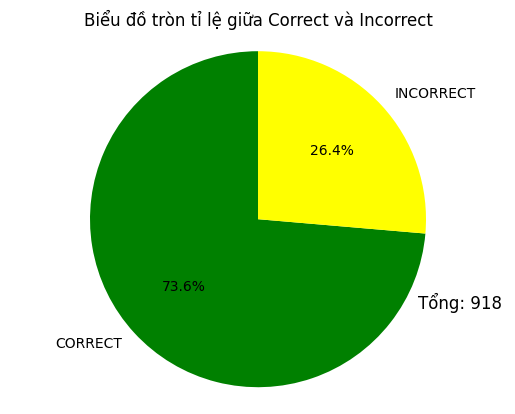

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Đếm số lần xuất hiện của mỗi giá trị trong cột 'graded'
counts = eval_data['graded'].value_counts()

total_count = len(eval_data)
plt.text(1.2, -0.5, f'Tổng: {total_count}', ha='center', va='center', fontsize=12, color='black')
# Vẽ biểu đồ cột
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow'])
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Biểu đồ tròn tỉ lệ giữa Correct và Incorrect')
plt.show()

In [ ]:
yes_no_qa =eval_data[eval_data['answer'].str.contains('yes|no', case=False)]
yes_no_qa

,query,answer,result,graded
0,Was Abraham Lincoln the sixteenth President of...,yes,"Yes, Abraham Lincoln was the sixteenth Presid...",CORRECT
1,Did Lincoln sign the National Banking Act of 1...,yes,"Yes, President Lincoln signed the National Ba...",CORRECT
2,Did his mother die of pneumonia?,no,"No, none of the individuals mentioned in the ...",CORRECT
5,What did The Legal Tender Act of 1862 establish?,"the United States Note, the first paper curren...",The Legal Tender Act of 1862 established the ...,CORRECT
8,Did Lincoln beat John C. Breckinridge in the 1...,yes,"No, Lincoln did not beat John C. Breckinridge...",INCORRECT
...,...,...,...,...
911,Was Wilson a remarkably effective writer and t...,Yes,"Yes, Wilson was a remarkable writer and think...",CORRECT
913,Was Wilson president of the American Political...,Yes,"Yes, Woodrow Wilson was indeed president of t...",CORRECT
914,Did he not cast his ballot for John M. Palmer ...,Yes,"Yes, according to the passage, Wilson did cas...",CORRECT
915,Did Wilson not spend 1914 through the beginnin...,Yes,"Yes, Wilson did spend 1914 through the beginn...",CORRECT


In [ ]:
infor_question =eval_data[~eval_data['answer'].str.contains('yes|no', case=False)]
infor_question

,query,answer,result,graded
3,How many long was Lincoln's formal education?,18 months,"According to the text, Lincoln's formal educa...",CORRECT
4,When did Lincoln begin his political career?,1832,"According to the text, Lincoln began his poli...",CORRECT
6,Who suggested Lincoln grow a beard?,11-year-old Grace Bedell,11-year-old Grace Bedell suggested that Lincol...,CORRECT
7,When did the Gettysburg address argue that Ame...,1776,The Gettysburg Address argued that America wa...,CORRECT
12,Which county was Lincoln born in?,Hardin County,"According to the text, Abraham Lincoln was bo...",INCORRECT
...,...,...,...,...
907,What was Scots-Irish and Scottish?,His ancestry,The term Scots-Irish refers to people who wer...,INCORRECT
908,"What defended slavery, owned slaves and S08_se...",His father,"\n\nThe person who defended slavery, owned sla...",INCORRECT
909,Who did Wilson win in 1917?,Irish Americans,Wilson won the support of the U.S. peace elem...,INCORRECT
912,What lived in Columbia?,Wilson,"In the 17th century, the District of Columbia...",INCORRECT


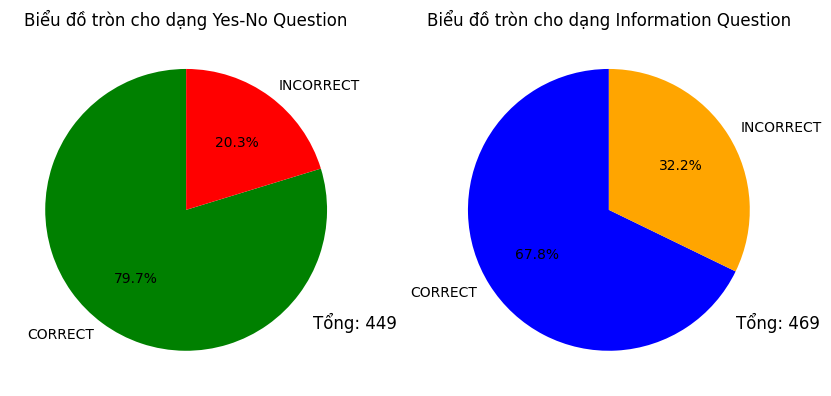

In [ ]:
counts = yes_no_qa['graded'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Biểu đồ tròn thứ nhất
axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axes[0].set_title('Biểu đồ tròn cho dạng Yes-No Question')
total1 = len(yes_no_qa)
axes[0].text(1.2, -0.8, f'Tổng: {total1}', ha='center', va='center', fontsize=12, color='black')


# Biểu đồ tròn thứ hai (ví dụ: giả sử có cột "another_column")
counts_another = infor_question['graded'].value_counts()
axes[1].pie(counts_another, labels=counts_another.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].set_title('Biểu đồ tròn cho dạng Information Question')
total2 = len(infor_question)
axes[1].text(1.2, -0.8, f'Tổng: {total2}', ha='center', va='center', fontsize=12, color='black')
# Hiển thị biểu đồ
plt.show()

In [ ]:
index = 31
graded_outputs = eval_chain.evaluate(parse_qa[index:index+1], qa_rs[index:index+1],answer_key='answer',prediction_key='result')
graded_outputs

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


[{'results': ' CORRECT'}]

Mounted at /content/drive


In [ ]:
import pandas as pd
eval_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Evaluate_data_final.csv")
eval_data